In [44]:

import pandas as pd
import matplotlib.pyplot as plt         

In [45]:
data = pd.read_csv('Crop and fertilizer dataset.csv')

In [46]:
data

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
...,...,...,...,...,...,...,...,...,...,...,...
4529,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4530,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4531,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4532,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo


In [47]:
#Count Null values
data.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       1
Link             0
dtype: int64

In [48]:
#No. of Rows and Columns
data.shape

(4534, 11)

In [49]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4534 non-null   object 
 1   Soil_color     4534 non-null   object 
 2   Nitrogen       4534 non-null   int64  
 3   Phosphorus     4534 non-null   int64  
 4   Potassium      4534 non-null   int64  
 5   pH             4534 non-null   float64
 6   Rainfall       4534 non-null   int64  
 7   Temperature    4534 non-null   int64  
 8   Crop           4534 non-null   object 
 9   Fertilizer     4533 non-null   object 
 10  Link           4534 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 389.8+ KB


In [50]:
#No. of Duplicates
data.duplicated().sum()

3

In [51]:
#Describe the data
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000
mean,95.199603,54.445523,63.403176,6.712616,818.041464,25.917512
std,38.097383,16.599499,35.726796,0.625147,251.728728,5.885764
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,100.000000,150.000000,8.500000,1700.000000,40.000000


In [52]:
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()


In [55]:
corr = data.corr()
corr

C:\Users\NAMRATA\AppData\Local\Temp\ipykernel_18316\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
Nitrogen,1.000000,0.695656,0.587027,0.186875,0.273269,-0.010655
Phosphorus,0.695656,1.000000,0.561322,0.237333,0.217389,-0.054176
Potassium,0.587027,0.561322,1.000000,0.079851,0.448487,0.052762
pH,0.186875,0.237333,0.079851,1.000000,0.101294,-0.002667
Rainfall,0.273269,0.217389,0.448487,0.101294,1.000000,0.313490
Temperature,-0.010655,-0.054176,0.052762,-0.002667,0.313490,1.000000


In [56]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

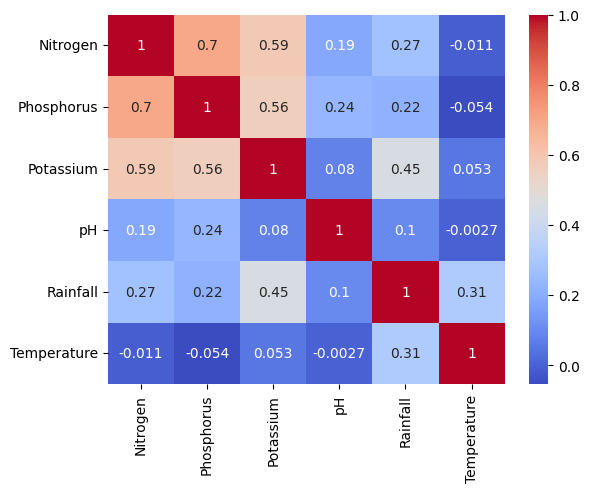

In [57]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [58]:
pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [60]:
def perform_encoding(df, columns, encoder=None):
    if encoder is None:
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(df[columns])
    encoded_data = pd.DataFrame(encoder.transform(df[columns]))
    feature_names = encoder.get_feature_names_out(columns)
    encoded_data.columns = feature_names
    return encoded_data, encoder


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [62]:
# Prepare the data
X_categorical = data[['District_Name', 'Soil_color']]
X_numerical = data[['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
y = data[['Crop', 'Fertilizer']]


In [63]:
X_categorical = data[['District_Name', 'Soil_color']]
X_numerical = data[['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']]
y = data[['Crop', 'Fertilizer']]


In [64]:
# Prepare the data

# Handle error for float to string conversion in District_Name and Soil_color
district_name = "Kolhapur"
soil_color = "Black"

In [67]:
# Prepare the input data
input_categorical = pd.DataFrame({
    'District_Name': [district_name],
    'Soil_color': [soil_color]
})

input_numerical = pd.DataFrame({
    'Nitrogen': float(75),
    'Phosphorus': float(50),
    'Potassium': float(100),
    'pH': float(6.5),
    'Rainfall': float(1000),
    'Temperature': float(20)
}, index=[0])  # Add an index here

# Now, concatenate both DataFrames along columns
input_data = pd.concat([input_categorical, input_numerical], axis=1)


In [68]:
def perform_encoding(df, columns, encoder=None):
    if encoder is None:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(df[columns])
    encoded_data = pd.DataFrame(encoder.transform(df[columns]).toarray(), columns=encoder.get_feature_names_out(columns))
    return encoded_data, encoder


In [69]:
# Encode the categorical variables in the dataset
categorical_columns = ['District_Name', 'Soil_color']
X_categorical_encoded, encoder = perform_encoding(X_categorical, categorical_columns)

In [70]:
# Concatenate the encoded categorical variables with the numerical variables
X_encoded = pd.concat([X_categorical_encoded, X_numerical], axis=1)


In [71]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [72]:

# Encode the input data
input_categorical_encoded, _ = perform_encoding(input_categorical, categorical_columns, encoder)
input_encoded = pd.concat([input_categorical_encoded, input_numerical], axis=1)

In [73]:
# Train the model
model = RandomForestClassifier()
# model.fit(X_train, y_train)
model.fit(X_test,y_test)


RandomForestClassifier()

In [74]:

# Predict the output
prediction = model.predict(input_encoded)

In [75]:

# Print the predicted crop and fertilizer
output_crop = prediction[0][0]
output_fertilizer = prediction[0][1]

In [76]:

# Find the corresponding link for the predicted crop and fertilizer
link = data[(data['Crop'] == output_crop) & (data['Fertilizer'] == output_fertilizer)]['Link'].values[0]

print("Predicted Crop:", output_crop)
print("Predicted Fertilizer:", output_fertilizer)
print("Link:", link)


Predicted Crop: Sugarcane
Predicted Fertilizer: DAP
Link: https://youtu.be/2t5Am0xLTOo
